# Lab 4: Clustering (Part 2)

**(Part 2 of 3)**   
By **Jackie Kazil** | Lab Assignment 4 | CSS 739, Spring 2015 | GeoSocial Analysis

### Question 2: How each clustering works (cont)
The three appraoches that were used are K-means, **Agglomerative**, and Affinity Propagation.

#### Agglomerative Clustering
Agglomerative clustering is a heirachical means of clustering points. The numbers of clusters is determined by how much you clusters items together. The individual points begin in a cluster of one. Then points that are near each other are clustered together. Then those clusters are clustered with the closest clusters. According to the [scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), it is summed up as, "Recursively merges the pair of clusters that minimally increases a given linkage distance." 

Let's see this in action. To start the process, first we load the data from the CSV file into a dataframe.

In [9]:
import matplotlib
%matplotlib inline

import pandas as pd
df = pd.read_csv('Olympic_torch_2012_UK.csv')

##### Settting up the function to apply agglomerative clustering

While I did most of my work with K-means using latitude and longtitude for clustering, for this clustering approach I first experimented with setting the 'date' values as the clustering factor. For a spatial comparison, this didn't bring any great relavationa and as you can see in the code below, the format of the date and time was converted into seconds for an easier comparison.

In [10]:
import time
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

# Convert date and time to seconds for clustering.
try:
    time_format = "%Y-%m-%d %H:%M:%S %Z"
    df['date'] = df['date'].apply(lambda x: time.mktime(time.strptime(str(x), time_format)))
except ValueError:
    pass

def graph_agglo(clusters, affinity="euclidean", lookup_keys=['date']):
    model = AgglomerativeClustering(n_clusters=clusters, linkage="average", affinity=affinity)
    output = model.fit(df[lookup_keys]).labels_
    fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.scatter(df['longitude'], df['latitude'], c=output)
    return

Next, I attempted a basic approach using each of the affinity type settings. Euclidean and city block seem to very similar. Cosine didn't seem to be helpful for this dataset, so I decided to focus on just Euclidean. 

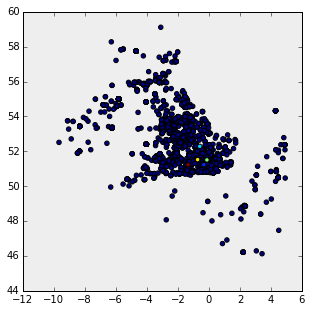

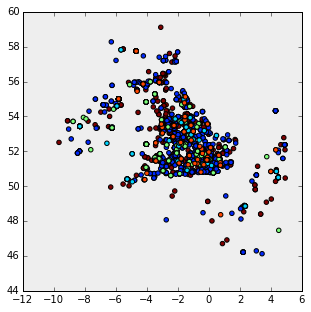

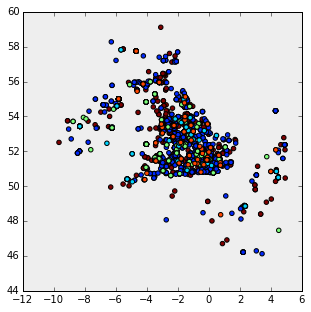

In [5]:
for affinity in ["cosine", "euclidean", "cityblock"]:
    graph_agglo(7, affinity)

Interestingly though, 

In [ ]:
from ipywidgets import StaticInteract, RangeWidget

StaticInteract(graph_agglo,
               clusters = RangeWidget(1, 10, 1),)

In [ ]:
graph_agglo(8, "euclidean", lookup_keys=['longitude','latitude'])

In [12]:
#import mplleaflet
#mplleaflet.display(fig=graph_agglo(4, "euclidean"))